In [1]:
# carregando bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 2. Teste para uma amostra

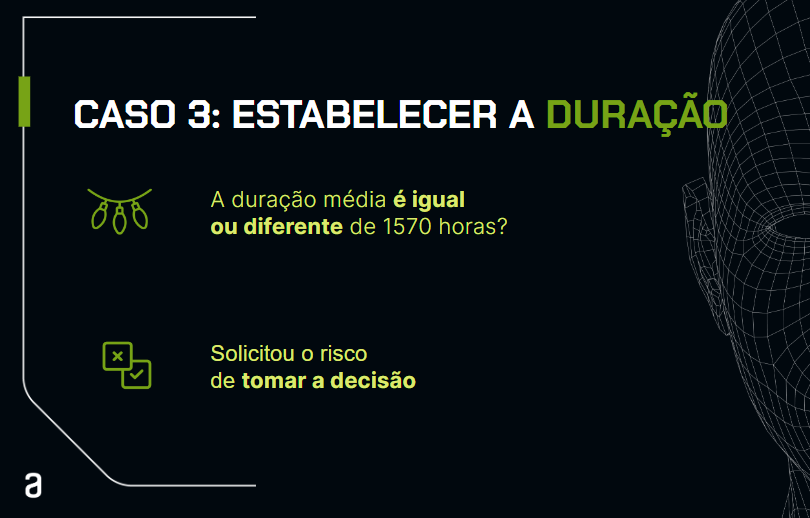

> Caso 3: Estabelecer a duração: Fomos contratados para mais um projeto para a indústria de lâmpadas, mas dessa vez para afirmar se a duração média de todas as lâmpadas de natal da marca é igual ou diferentes de 1565 horas.

## 2.1 Formulando a hipótese

In [2]:
# hipotese nula
hipotese = 1570

Estabelecidas as hipóteses,

$H_0 : \mu = 1570$\
$H_1 : \mu \neq 1570$

podemos identificar o critério para rejeitar ou não a hipótese estabelecida, mas antes vamos conhecer nossa região crítica, o critério de rejeição.


## 2.2 Estabelecendo a regra de decisão

Para tomar essa decisão e cálcular a probalidade de estarmos assumindo um erro, precisamos considerar uma regra de decisão, ou seja, entender quando vamos assumir que Ho é rejeitada.

Para essa regra, podemos levar em consideração uma conceito que já vimos aqui, o intervalo de confiança, que estabelece uma margem de erro para a média a partir de um nivel de confiança na variabilidade dos dados.




In [3]:
# dados amostrais
lampadas_natalinas = pd.read_csv('/content/experimento_lampadas_natalinas.csv')


#média amostral
lampadas_natalinas['duracao'].mean()

1529.5081310675512

In [4]:
#informações para a região crítica

confianca = 0.95  # Nível de confiança desejado
desvio_padrao_populacional = 105  #sigma dado pela fabrica
tamanho_amostra = len(lampadas_natalinas['duracao'])

In [5]:
#Importando Scipy
from scipy import stats

In [6]:
#calculando o IC

intervalo = stats.norm.interval(confianca,
                                loc=1570,
                                scale = desvio_padrao_populacional/np.sqrt(tamanho_amostra))



Esse é o intervalo de confiança, estabelecido pela amostra à 95% de confiança sob Ho.


In [7]:
# Calcula o intervalo de confiança
print("IC (95%): ", intervalo)

IC (95%):  (1549.4203781623294, 1590.5796218376706)


  Calculando a média amostral, obtemos 1530.30 horas, esse valor não está contido na região de aceitação. Ou seja, Não podemos dizer que a duração média das lampadas é 1570 à 95% de confiança.

  Mas qual a probabilidade de estar rejeitando incorretamente Ho? Para isso precisamos entender os erros associados a essa decisão.

## 2.3 Erros associados a testes de hipóteses
Qualquer que seja a decisão tomada, estamos sujeitos a cometer erros: \
O erro de rejeitar Ho quando na verdade ela é verdadeira, e o erro de não rejeitar Ho, mas ela é falsa.



In [8]:
# nível de significancia: quando você rejeita erroneamente a hipótese nula quando ela é realmente verdadeira.


## 2.4 Em qual intensidade estamos rejeitando a hipótese?


Perceba que até agora estabelecemos um nível de confiança para interpretar nossos resultamos, no entanto nossa decisão pode alterar dependendo do rigor de confiança que estabelecemos

In [9]:
#importando o teste Z do statsmodels

from statsmodels.stats.weightstats import ztest

In [10]:
#Executando o teste z

stats, p_valor = ztest(x1 =  lampadas_natalinas['duracao'], value = 1570, alternative = 'two-sided')

In [11]:
# média amostral

lampadas_natalinas['duracao'].mean()

1529.5081310675512

In [12]:
# Exibe os resultados
print(f'{p_valor:.20f}')


0.00000000000000000000


In [13]:
# Verifica a hipótese nula com base no valor-p


if p_valor < 0.05:
    conclusao = "Rejeitar a hipótese nula"
else:
    conclusao = "Não rejeita a hipótese nula"


print("Conclusão:", conclusao)

Conclusão: Rejeitar a hipótese nula



**Estatística Z:** O valor da estatística Z é -2.63, Isso indica que a média da amostra está cerca de 2,63 desvios padrão abaixo da média populacional assumida na hipótese nula. O sinal negativo sugere que a média da amostra está abaixo da média populacional hipotética.



 **P-valor: 0.008**: Isso representa a probabilidade de obter uma estatística Z tão ou mais extrema do que a observada, assumindo que a hipótese nula é verdadeira. Há uma probabilidade de 0.8% de observarmos uma média de amostra tão ou mais discrepante da média hipotética.
